## Q2. Gibbs Sampling

*Author: Wenjing Xu, Yanfei Zhou, Yijia Zhao*

**Step 1: Use Inverse Transform Sampling to generate the samples from the conditional distribution**

From $P(x|y) \propto ye^{-yx}$, $0 < x < B < \infty$, we have $\int_{0}^{B}Kye^{-yx} = 1$, so $K = \frac{1}{1-e^{-yB}}$

The CDF of this conditional distribution is $F(x|y) = \frac{1}{1-e^{-yB}} (1- e^{-yx})$

Further, the inverse of this CDF is $F^{-1}_{(x|y)}(u) = -\frac{ln[1-u(1-e^{-yB})]}{y}$

Similarly, we have $F^{-1}_{(y|x)}(u) = -\frac{ln[1-u(1-e^{-xB})]}{x}$

These inverse CDF's will be used to generate joint sample from the given conditional distribution.

**Step 2: We will then use Gibbs sampler to estimate the marginal distribution, and store results in a matrix.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## First define a functino that will give us the inverse CDF of the given conditional distribution.
def inverse_sampler(B,theta):
    u = np.random.random()
    norm_constant = 1-np.exp(-B*theta)
    x = -np.log(1-u*norm_constant)/theta
    return(x)

## Second, define a funtion that will return updated value of x and y based on the given conditional distribution. 
## The sequence we get can be used to approximate the joint distribution. 
def Gibbs_sampler(B,sample_size, start_value=1):
    sample_chain = np.zeros(sample_size*2).reshape(2,sample_size)  # define a matrix to store results
    start_y = start_value   # give a start value of y
    for i in range(sample_size):
        sample_chain[0,i] = inverse_sampler(B,start_y)   # update x value and store it in the first row of the matrix
        sample_chain[1,i] = inverse_sampler(B,sample_chain[0,i]) # update y value and store it in the second row of the matrix
        start_y = sample_chain[1,i]
    return(sample_chain)

Therefore, the `sample_chain` matrix will give us the approximate joint distribution of x and y based on the given conditional distribution.

**Step 3: For B=5, and for sample sizes T = 500,5000,50000, plot the histogram of values for x.**

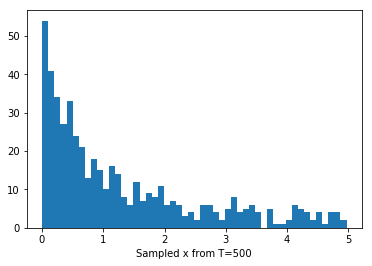

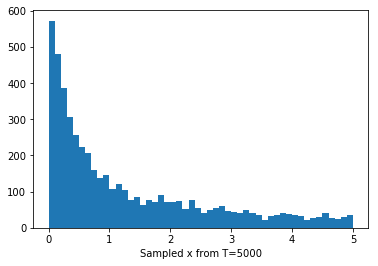

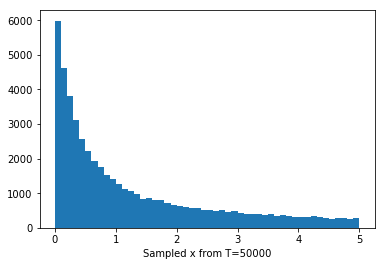

In [3]:
chain1 = Gibbs_sampler(5,500)
chain2 = Gibbs_sampler(5,5000)
chain3 = Gibbs_sampler(5,50000)

plt.hist(chain1[0,:],bins=50)
plt.xlabel("Sampled x from T=500")
plt.show()

plt.hist(chain2[0,:],bins=50)
plt.xlabel("Sampled x from T=5000")
plt.show()

plt.hist(chain3[0,:],bins=50)
plt.xlabel("Sampled x from T=50000")
plt.show()

As these three histograms show, with more numbers of iterations and larger sample size, the marginal distribution of X becomes more closer to exponetial distribution.

**Step 4: Provide an estimate of the expectation of X**

Based on our simulated sample, it is straightforward to calculate the expectation of X from its marginal distribution. 

In [4]:
print ("E(x) estimated from 500 sampler = %s" % (np.mean(chain1[0,:])))
print ("E(x) estimated from 5000 sampler = %s" % (np.mean(chain2[0,:])))
print ("E(x) estimated from 50000 sampler = %s" % (np.mean(chain3[0,:])))

E(x) estimated from 500 sampler = 1.29550437883
E(x) estimated from 5000 sampler = 1.28369853795
E(x) estimated from 50000 sampler = 1.2596060758


Based on the samples of X from our Gibbs sampler, an estimate of the expectation of X that we can give is about 1.26.  